In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings


df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/1d_nonlinear_regression_data.csv')
df.head()

,x,y
0,-5.0,-1.322714
1,-4.8,-0.477538
2,-4.6,0.305064
3,-4.4,1.505136
4,-4.2,1.684154


Text(0.5, 1.0, 'Nonlinear regression data')

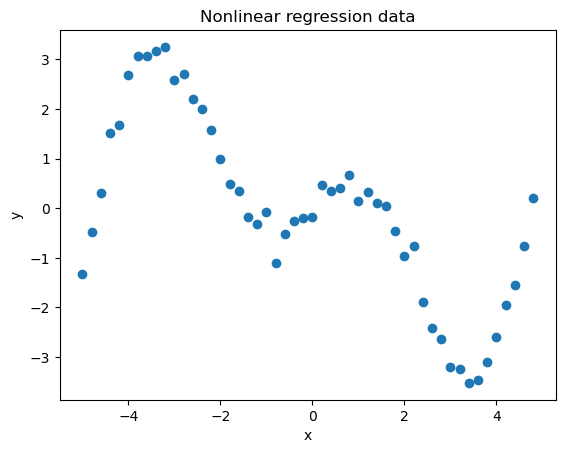

In [7]:
plt.figure() #plotting the data
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear regression data')

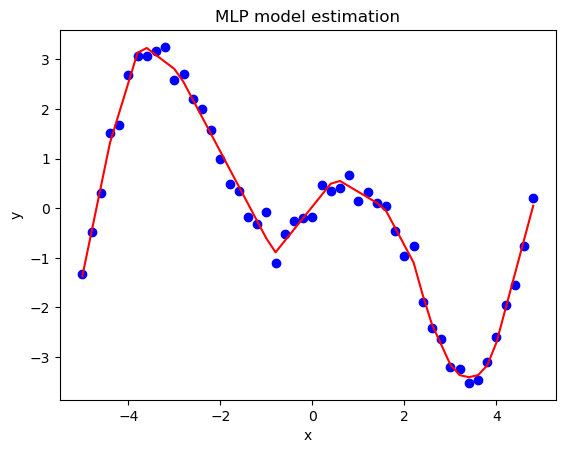

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 


x = df[['x']]
y = df[['y']]

#standardise the input feature for accurate modelling
scaler = StandardScaler()
scaler.fit(x)
xs = scaler.transform(x) #generate standardised input feature

#MLP with 1 hidden layer of 20 neurons
clf = MLPRegressor(hidden_layer_sizes=(20),max_iter=1000,
                  early_stopping=False,activation='relu',solver='lbfgs')

#traing MLP model
clf.fit(xs,y)

#predict the observation data
y_pred = clf.predict(xs)

plt.figure()
plt.scatter(x,y,color="blue")
plt.plot(x,y_pred,color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP model estimation')
plt.show()

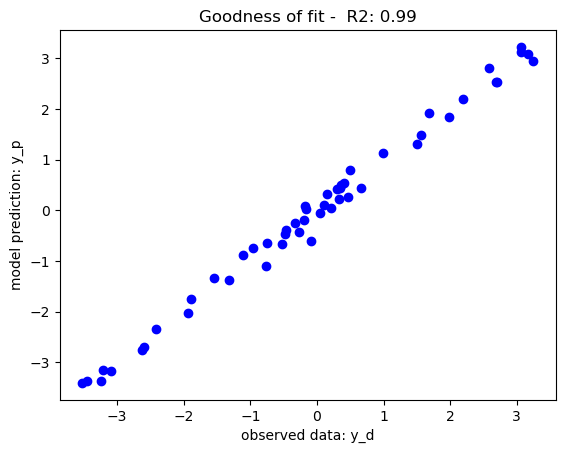

In [21]:
from sklearn.metrics import r2_score

r2_score_m = r2_score(y_pred,y)

plt.figure()
plt.scatter(y, y_pred, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Goodness of fit -  R2: %.2f'%r2_score_m)
plt.show() 